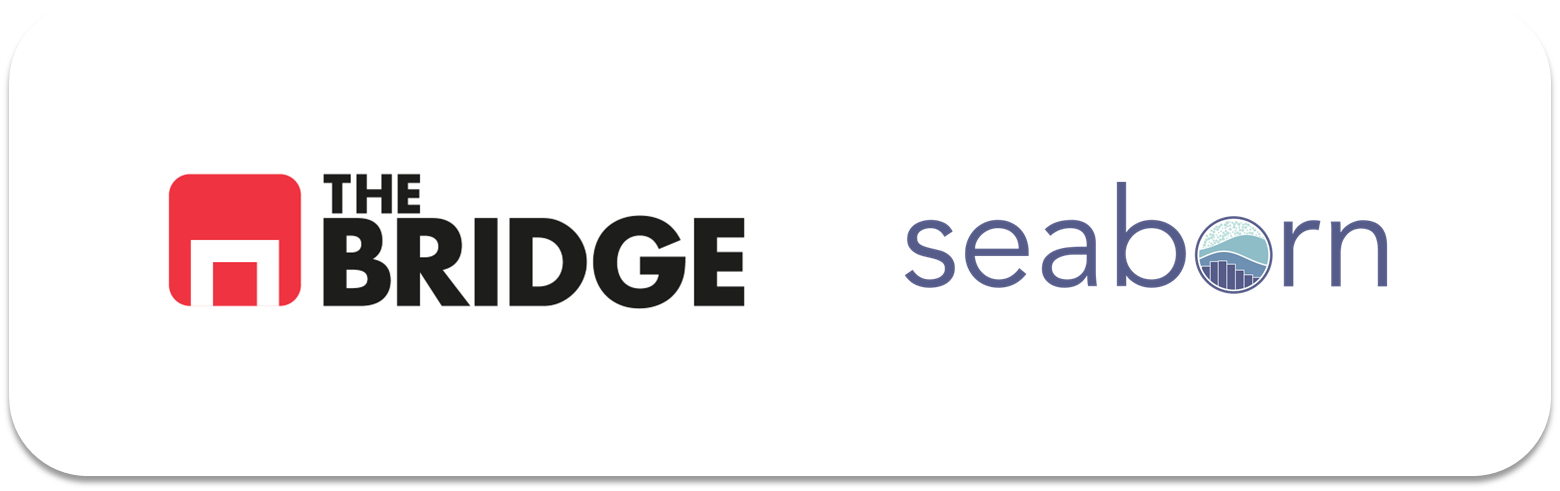

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [20]:
# Ruta del archivo
file_path = r"C:\Users\hp\Desktop\Python Scripts\cities.csv"

# Leer el archivo asegurando que ninguna columna se use como índice y ajustando el delimitador
df_cities = pd.read_csv(file_path, delimiter=';', encoding='utf-8', skiprows=1, index_col=False)

# Verificar cuántas columnas tiene el archivo
print("Número de columnas detectadas:", len(df_cities.columns))

# Restaurar manualmente los encabezados según el número de columnas detectadas
df_cities.columns = [
    "city", "latd", "longd", "elevation_m", "elevation_ft", "population_total",
    "area_total_sq_mi", "area_land_sq_mi", "area_water_sq_mi",
    "area_total_sq_km", "area_land_sq_km", "area_water_sq_km",
    "dummy1", "dummy2", "dummy3", "dummy4"  # Ajustar nombres adicionales según sea necesario
]

# Verificar el DataFrame restaurado
print("Columnas disponibles en el DataFrame:")
print(df_cities.columns)

# Convertir las columnas relevantes a numéricas
columnas_numericas = [
    "latd", "longd", "elevation_m", "elevation_ft", "population_total",
    "area_total_sq_mi", "area_land_sq_mi", "area_water_sq_mi",
    "area_total_sq_km", "area_land_sq_km", "area_water_sq_km"
]

df_cities[columnas_numericas] = df_cities[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Rellenar valores faltantes con la media de cada columna
df_cities.fillna(df_cities.mean(numeric_only=True), inplace=True)

# Mostrar las primeras filas del DataFrame final
print("\nPrimeras filas del DataFrame después de procesar los datos:")
print(df_cities.head())

Número de columnas detectadas: 16
Columnas disponibles en el DataFrame:
Index(['city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_sq_km', 'area_land_sq_km',
       'area_water_sq_km', 'dummy1', 'dummy2', 'dummy3', 'dummy4'],
      dtype='object')

Primeras filas del DataFrame después de procesar los datos:
   city  latd  longd      elevation_m  elevation_ft  population_total  \
0     1   NaN     34   15333333333333           118    76166666666667   
1     2   NaN     37   75611111111111           122    27444444444444   
2     3   NaN     37  886944444444445           122    29777777777778   
3     4   NaN     34   81944444444446           118               135   
4     5   NaN     33              575           117    72555555555556   

   area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  area_total_sq_km  \
0               281                0                 7           20

In [21]:
df_cities

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_sq_km,area_land_sq_km,area_water_sq_km,dummy1,dummy2,dummy3,dummy4
0,1,NaN,34,15333333333333,118,76166666666667,281,0,7,20330.0,922.0,2.900000e+16,20.0,20.0,7.600000e+01,37.000000
1,2,NaN,37,75611111111111,122,27444444444444,33,0,10,96.0,75467.0,4.650000e+02,27.0,31.0,7.900000e+01,27.089202
2,3,NaN,37,886944444444445,122,29777777777778,43,0,1,465.0,18969.0,1.550000e+02,4.0,9.0,2.800000e+01,27.089202
3,4,NaN,34,81944444444446,118,135,150,0,7,83089.0,492.0,1.000000e+00,19.0,19.0,3.000000e+00,1.000000
4,5,NaN,33,575,117,72555555555556,127,0,7,47823.0,417.0,0.000000e+00,19.0,19.0,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,NaN,38,403055555555554,122,36222222222221,30,0,1,2933.0,98.0,0.000000e+00,3.0,3.0,0.000000e+00,0.000000
477,478,NaN,41,72666666666667,122,6375,787,0,10,7765.0,2582.0,7.300000e+01,26.0,25.0,1.880000e+02,72.000000
478,479,NaN,39,13472222222222,121,6261111111111,18,0,14,64925.0,59.0,7.800000e+01,37.0,37.0,2.010000e+02,53.000000
479,480,NaN,34,30277777777776,117,4861111111111,798,0,27,51367.0,2618.0,5.000000e+00,72.0,72.0,1.300000e+16,2.000000


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [22]:
def scatter_plot_advanced(
    dataframe,
    num_col1,
    num_col2,
    cat_col=None,
    size_param=50,
    scale=1,
    legend=True
):
    """
    Función para pintar diagramas de dispersión avanzados.

    Args:
    dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    num_col1 (str): Nombre de la primera columna numérica (eje X).
    num_col2 (str): Nombre de la segunda columna numérica (eje Y).
    cat_col (str, optional): Nombre de la columna categórica (por defecto None).
    size_param (int or str): Tamaño de los puntos o columna para controlar el tamaño.
    scale (float): Factor de escala para el tamaño si size_param es una columna.
    legend (bool): Si True, muestra la leyenda de colores y tamaños. Si False, incluye un colorbar.
    """
    plt.figure(figsize=(10, 6))
    
    # Determinar el tamaño de los puntos
    if isinstance(size_param, str):
        if size_param in dataframe.columns:
            # Escalar los valores de la columna
            sizes = dataframe[size_param] * scale
        else:
            raise ValueError(f"La columna '{size_param}' no existe en el DataFrame.")
    else:
        sizes = size_param  # Usar el tamaño fijo
    
    # Crear el diagrama de dispersión
    scatter = sns.scatterplot(
        data=dataframe,
        x=num_col1,
        y=num_col2,
        hue=cat_col if cat_col else None,
        size=sizes if isinstance(size_param, str) else None,
        sizes=(20, 200) if isinstance(size_param, str) else size_param,
        palette="Set2" if cat_col else None,
        alpha=0.7
    )
    
    # Configurar leyendas y colorbar
    if legend:
        plt.legend(title=cat_col if cat_col else "Leyenda", loc="best")
    else:
        # Usar colorbar para los tamaños si hay columna de tamaño
        if isinstance(size_param, str):
            norm = plt.Normalize(dataframe[size_param].min(), dataframe[size_param].max())
            sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
            sm.set_array([])
            plt.colorbar(sm, label=size_param)

    # Personalizar los ejes y el título
    plt.title(f"Diagrama de dispersión: {num_col1} vs {num_col2}")
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)

    plt.show()



In [24]:
print(df_cities.columns)

Index([';city;latd;longd;elevation_m;elevation_ft;population_total;area_total_sq_mi;area_total_sq_mi;area_land_sq_mi;area_land_sq_mi;area_water_sq_mi;area_total_km2;area_land_km2;area_water_km2;area_water_percent'], dtype='object')


In [10]:
print(df_cities)

            42;16;12;N;71;48;0;W;Worcester;MA
0    43;37;48;N;89;46;11;W;Wisconsin Dells;WI
1        36;5;59;N;80;15;0;W;Winston-Salem;NC
2             49;52;48;N;97;9;0;W;Winnipeg;MB
3          39;11;23;N;78;9;36;W;Winchester;VA
4         34;14;24;N;77;55;11;W;Wilmington;NC
..                                        ...
119            39;31;12;N;119;48;35;W;Reno;NV
120           50;25;11;N;104;39;0;W;Regina;SA
121       40;10;48;N;122;14;23;W;Red Bluff;CA
122          40;19;48;N;75;55;48;W;Reading;PA
123           41;9;35;N;81;14;23;W;Ravenna;OH

[124 rows x 1 columns]


In [28]:
# Ruta del archivo
file_path = r"C:\Users\hp\Desktop\Python Scripts\cities.csv"

# Leer el archivo con el delimitador correcto
try:
    # Usar ';' como delimitador
    df_cities = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

    # Verificar las columnas disponibles
    print("Columnas disponibles en el DataFrame:")
    print(df_cities.columns.tolist())

    # Mostrar las primeras filas del DataFrame para confirmar
    print("\nPrimeras filas del DataFrame:")
    print(df_cities.head())
except Exception as e:
    print(f"Error al procesar el archivo: {e}")

Columnas disponibles en el DataFrame:
['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft', 'population_total', 'area_total_sq_mi', 'area_total_sq_mi.1', 'area_land_sq_mi', 'area_land_sq_mi.1', 'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2', 'area_water_percent']

Primeras filas del DataFrame:
   Unnamed: 0         city  latd            longd  elevation_m  \
0           0     Adelanto    34   57611111111112          117   
1           1  AgouraHills    34   15333333333333          118   
2           2      Alameda    37   75611111111111          122   
3           3       Albany    37  886944444444445          122   
4           4     Alhambra    34   81944444444446          118   

     elevation_ft  population_total  area_total_sq_mi  area_total_sq_mi.1  \
0  43277777777779               875                 0                  56   
1  76166666666667               281                 0                   7   
2  27444444444444                33

In [30]:
df_cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_total_sq_mi.1,area_land_sq_mi,area_land_sq_mi.1,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34,57611111111112,117,43277777777779,875,0,56,31765,2871,1.800000e+16,145.0,145.0,4.600000e+01,3.0
1,1,AgouraHills,34,15333333333333,118,76166666666667,281,0,7,20330,922,2.900000e+16,20.0,20.0,7.600000e+01,37.0
2,2,Alameda,37,75611111111111,122,27444444444444,33,0,10,96,75467,4.650000e+02,27.0,31.0,7.900000e+01,NaN
3,3,Albany,37,886944444444445,122,29777777777778,43,0,1,465,18969,1.550000e+02,4.0,9.0,2.800000e+01,NaN
4,4,Alhambra,34,81944444444446,118,135,150,0,7,83089,492,1.000000e+00,19.0,19.0,3.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38,403055555555554,122,36222222222221,30,0,1,2933,98,0.000000e+00,3.0,3.0,0.000000e+00,0.0
478,478,Yreka,41,72666666666667,122,6375,787,0,10,7765,2582,7.300000e+01,26.0,25.0,1.880000e+02,72.0
479,479,YubaCity,39,13472222222222,121,6261111111111,18,0,14,64925,59,7.800000e+01,37.0,37.0,2.010000e+02,53.0
480,480,Yucaipa,34,30277777777776,117,4861111111111,798,0,27,51367,2618,5.000000e+00,72.0,72.0,1.300000e+16,2.0


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

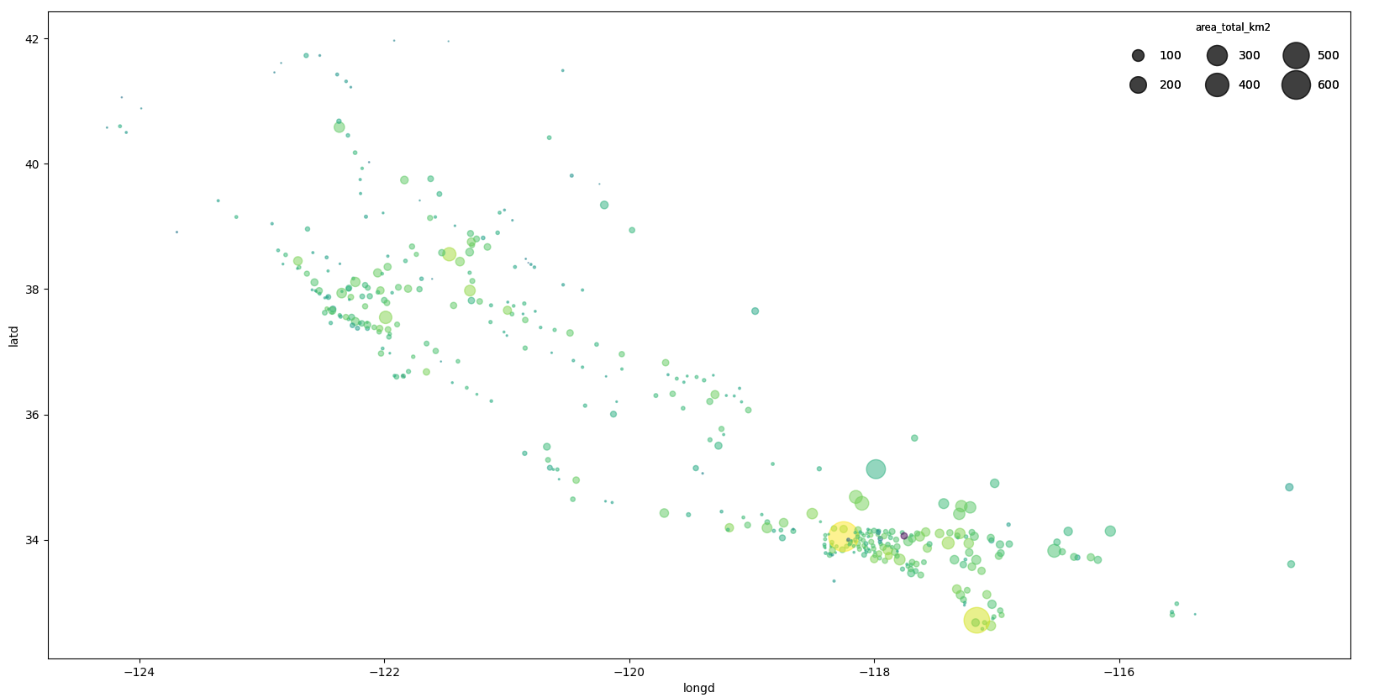

Columna 'log_poblacion' creada correctamente.


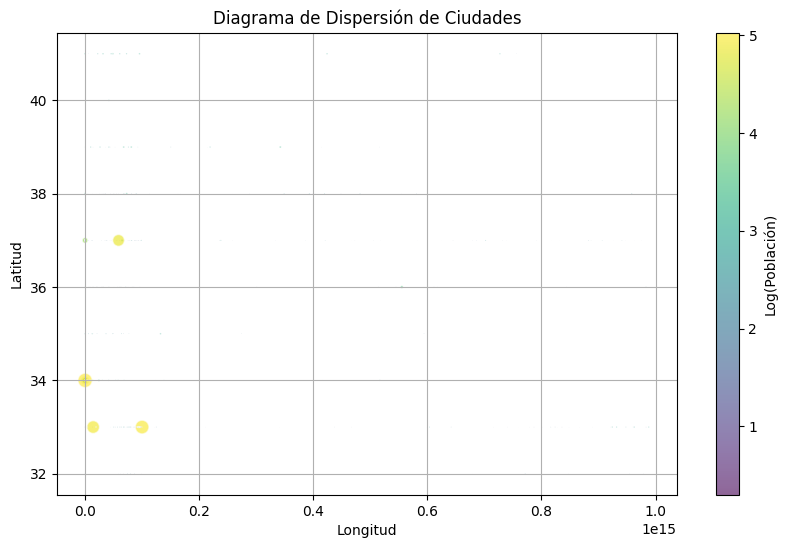

In [37]:
# Crear la columna "log_poblacion" calculando el logaritmo decimal de la población
try:
    df_cities['population_total'] = pd.to_numeric(df_cities['population_total'], errors='coerce')  # Asegurar que sea numérico
    df_cities['log_poblacion'] = np.log10(df_cities['population_total'].replace(0, np.nan))  # Evitar log(0)
    print("Columna 'log_poblacion' creada correctamente.")
except KeyError as e:
    print(f"Error al crear la columna 'log_poblacion': {e}")

# Verificar si la columna existe antes de proceder con el gráfico
if 'log_poblacion' in df_cities.columns:
    # Crear el diagrama de dispersión
    plt.figure(figsize=(10, 6))

    scatter = plt.scatter(
        df_cities['longd'],
        df_cities['latd'],
        s=df_cities['population_total'] / 1000,  # Tamaño de los puntos
        c=df_cities['log_poblacion'],  # Color basado en log_poblacion
        cmap='viridis',  # Mapa de colores
        alpha=0.6,
        edgecolors="w"
    )

    # Añadir una barra de color
    plt.colorbar(scatter, label='Log(Población)')

    # Etiquetas y título
    plt.title('Diagrama de Dispersión de Ciudades')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')

    # Mostrar el gráfico
    plt.grid()
    plt.show()
else:
    print("La columna 'log_poblacion' no se encontró. Verifica que los datos son correctos.")

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

Slide 1: El Titanic fue un accidente con una tasa de mortalidad alta
Mensaje principal:

La tragedia del Titanic fue un evento devastador con una tasa de mortalidad general del 68%.
Visualización recomendada:

Un gráfico circular (pie chart) mostrando la proporción de personas que sobrevivieron frente a las que fallecieron.
Datos:
Sobrevivieron: ~32%
Fallecieron: ~68%  

In [3]:
file_path_titanic = r"C:\Users\hp\Desktop\Python Scripts\titanic.csv"


In [39]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


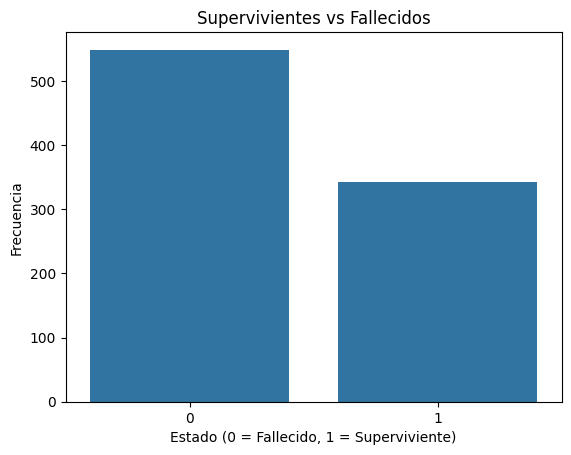

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que df_titanic está definido y cargado
# sns.countplot para generar el gráfico
sns.countplot(data=df_titanic, x='survived')
plt.title('Supervivientes vs Fallecidos')
plt.xlabel('Estado (0 = Fallecido, 1 = Superviviente)')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

Slide 2: En esa ocasión, los datos apoyan "Mujeres y niños primero", pero...
Mensaje principal:

La tasa de supervivencia fue significativamente más alta para mujeres y niños que para hombres.
Tasa de supervivencia:
Mujeres: ~75%
Niños: ~50%
Hombres: ~20%
Visualización recomendada:

Un gráfico de barras agrupadas (bar plot) mostrando la tasa de supervivencia por género y grupo de edad.

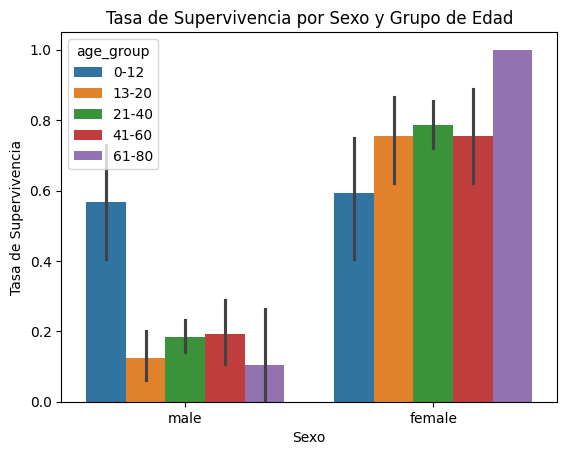

In [51]:
# Asegurarnos de que los nombres de las columnas estén en minúsculas (si no están así ya)
df_titanic.columns = df_titanic.columns.str.lower()

# Crear categorías de edad si 'age' es numérica
if 'age' in df_titanic.columns and pd.api.types.is_numeric_dtype(df_titanic['age']):
    df_titanic['age_group'] = pd.cut(
        df_titanic['age'],
        bins=[0, 12, 20, 40, 60, 80],
        labels=['0-12', '13-20', '21-40', '41-60', '61-80']
    )
else:
    print("Error: La columna 'age' no existe o no es numérica.")

# Asegurarnos de que 'sex' y 'survived' están en el DataFrame
if 'sex' in df_titanic.columns and 'survived' in df_titanic.columns:
    # sns.barplot para generar el gráfico
    sns.barplot(data=df_titanic, x='sex', y='survived', hue='age_group')
    plt.title('Tasa de Supervivencia por Sexo y Grupo de Edad')
    plt.xlabel('Sexo')
    plt.ylabel('Tasa de Supervivencia')

    # Mostrar la gráfica
    plt.show()
else:
    print("Error: Las columnas 'sex' o 'survived' no existen en el DataFrame.")

Slide 3: ... que la clase en la que se viaja tuvo una influencia significativa y podría explicar...
Mensaje principal:

La tasa de supervivencia disminuye drásticamente de primera clase (~63%) a tercera clase (~24%).
Las diferencias entre las clases reflejan desigualdad en el acceso a recursos y a los botes salvavidas.
Visualización recomendada:

Un gráfico de barras mostrando la tasa de supervivencia por clase.

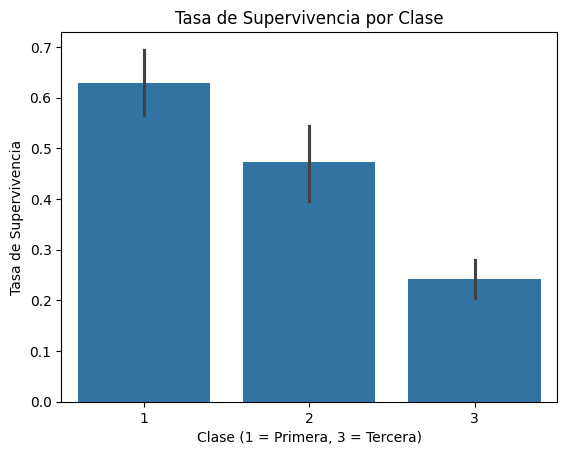

In [53]:
# Asegurarnos de que las columnas tienen los nombres correctos
df_titanic.columns = df_titanic.columns.str.lower()  # Convertir a minúsculas

# Verificar si las columnas necesarias existen
if 'pclass' in df_titanic.columns and 'survived' in df_titanic.columns:
    # Crear el gráfico de barras
    sns.barplot(data=df_titanic, x='pclass', y='survived')
    plt.title('Tasa de Supervivencia por Clase')
    plt.xlabel('Clase (1 = Primera, 3 = Tercera)')
    plt.ylabel('Tasa de Supervivencia')
    plt.show()
else:
    print("Error: Las columnas 'pclass' o 'survived' no están presentes en el DataFrame.")

Slide 4: ... las diferencias de tasas de supervivencia entre mujeres y niños
Mensaje principal:

Mujeres de primera clase tuvieron una tasa de supervivencia del ~95%, mientras que las mujeres de tercera clase solo ~46%.
Niños en primera clase sobrevivieron en un ~83%, mientras que en tercera clase solo un ~34%.
Visualización recomendada:

Un gráfico de barras apiladas o un gráfico de barras agrupadas mostrando la tasa de supervivencia por clase y género.

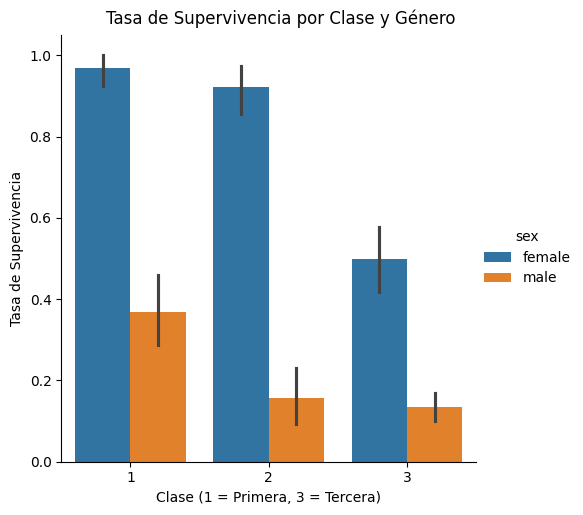

In [55]:
# Asegurarnos de que las columnas tienen los nombres correctos
df_titanic.columns = df_titanic.columns.str.lower()  # Convertir a minúsculas

# Verificar si las columnas necesarias existen
if {'pclass', 'survived', 'sex'}.issubset(df_titanic.columns):
    # Crear el gráfico de barras con catplot
    plot = sns.catplot(data=df_titanic, x='pclass', y='survived', hue='sex', kind='bar')
    plot.fig.suptitle('Tasa de Supervivencia por Clase y Género', y=1.02)  # Añadir título con ajuste
    plot.set_axis_labels('Clase (1 = Primera, 3 = Tercera)', 'Tasa de Supervivencia')  # Etiquetas de ejes
    plt.show()
else:
    print("Error: Las columnas 'pclass', 'survived' o 'sex' no están presentes en el DataFrame.")

Slide 5: Además, aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno
Mensaje principal:

Los pasajeros que embarcaron en Cherburgo (C) tenían una mayor tasa de supervivencia (~55%) comparado con Southampton (~33%) y Queenstown (~39%).
Esto podría explicarse por el hecho de que más pasajeros de primera clase embarcaron en Cherburgo.
Visualización recomendada:

Un gráfico de barras mostrando la tasa de supervivencia por puerto de embarque.
Complemento: Un gráfico de barras mostrando la distribución de clases por puerto.
python
Copy code


C:\Users\hp\AppData\Local\Temp\ipykernel_13328\3731254923.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_titanic, x='embarked', y='survived', ci=None)


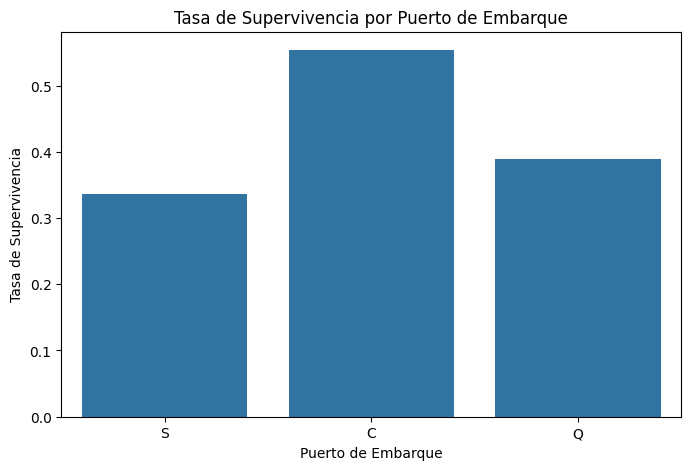

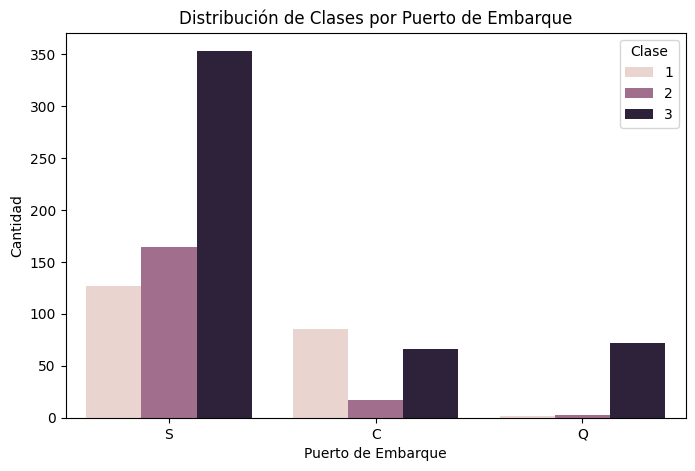

In [56]:
# Asegurarnos de que las columnas tienen los nombres correctos
df_titanic.columns = df_titanic.columns.str.lower()  # Convertir a minúsculas

# Verificar si las columnas necesarias existen
if {'embarked', 'survived', 'pclass'}.issubset(df_titanic.columns):
    # Primera gráfica: Tasa de Supervivencia por Puerto de Embarque
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_titanic, x='embarked', y='survived', ci=None)
    plt.title('Tasa de Supervivencia por Puerto de Embarque')
    plt.xlabel('Puerto de Embarque')
    plt.ylabel('Tasa de Supervivencia')
    plt.show()

    # Segunda gráfica: Distribución de Clases por Puerto de Embarque
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_titanic, x='embarked', hue='pclass')
    plt.title('Distribución de Clases por Puerto de Embarque')
    plt.xlabel('Puerto de Embarque')
    plt.ylabel('Cantidad')
    plt.legend(title='Clase')
    plt.show()
else:
    print("Error: Las columnas 'embarked', 'survived' o 'pclass' no están presentes en el DataFrame.")